In [1]:
import pandas as pd
import numpy as np

# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease **classification**.

For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**binary classification**). 

If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

We'll start with the heart disease dataset we've worked on in previous modules and we'll approach the problem following the machine learning modelling framework.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/ml101-6-step-ml-framework-tools.png?raw=true" width=7500/> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework |

More specifically, we'll look at the following topics.

| Step | What we'll cover |
|:-----|:-----|
| **Exploratory data analysis (EDA)** | The process of going through a dataset and discovering more about it. |
| **Model training**  | Create model(s) to learn to predict a target variable based on other variables. |
| **Model evaluation** | Evaluating a model's predictions using problem-specific evaluation metrics. |
| **Model comparison** | Comparing several different models to find the best one. |
| **Model hyperparameter tuning** | Once we've found a good model, can we tweak its hyperparameters to improve it? |
| **Feature importance** | Since we're predicting the presence of heart disease, are there some features/characteristics that are more important for prediction? |
| **Cross-validation** | If we do build a good model, can we be sure it will work on unseen data? |
| **Reporting what we've found** | If we had to present our work, what would we show someone? |

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy. 

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

## 1. Going through the 6 step ML framework

### 1.1 Problem Definition

In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information such as health characteristics) about a person to predict whether they have heart disease or not.

In a statement,

*Given clinical parameters about a patient, can we predict whether or not they have heart disease?*

### 1.2 What data are we using?

What you'll want to do here is dive into the data your problem definition is based on. 

This may involve, sourcing data (if it doesn't already exist), defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> **Note:** We use the independent variable(s)to predict our dependent variable(s).

In our case, the independent variables are a patient's different medical attributes and the dependent variable is whether or not they have heart disease.

### 1.3 How will we evaluate our model?

An evaluation metric is something you usually define at the start of a project.

However, since machine learning is very experimental, it can change over time.

But to begin a project, you might say something like:

*If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.*

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

Of course, as the project progresses and gets tested in the real world, you may have to adjust this goal/threshold.

### 1.4 Which features of the data will be important to us?

Features are different parts and characteristics of the data. 

During this step, you'll want to start exploring what each portion of the data relates to and then create a reference you can use to look up later on.

One of the most common ways to do this is to create a **data dictionary**.

#### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. 

Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## 2. Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk (as you can see in the code cell below).

However, in practice, when starting on new projects you may import libraries as you go (because you don't know what you need ahead of time).  

After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. 

This is where you may want to consolidate every library you've used at the top of your notebook.

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [2]:
# Regular EDA and plotting libraries
# %load_ext cuml.accel
import numpy as np # np is short for numpy

import pandas as pd # pandas is so commonly used, it's shortened to pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns # seaborn gets shortened to sns, TK - can seaborn be removed for matplotlib (simpler)?

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-11-01 01:24:40.052652

NumPy version: 2.2.6
pandas version: 2.3.1
matplotlib version: 3.10.5
Scikit-Learn version: 1.7.1


## 3. Loading Data

There are many different ways to store data. 

One typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format or CSV format. 

[CSV](https://en.wikipedia.org/wiki/Comma-separated_values) stands for comma-separated values.

Other common formats include [JSON](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON), [SQL](https://en.wikipedia.org/wiki/SQL) and [parquet](https://parquet.apache.org/).

Pandas has a built-in function to read `.csv` files called [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) which takes the file pathname of your `.csv` file. You'll likely use this a lot.

> **Note:** CSV format is good for smaller datasets but can face some speed issues when working with larger datasets. For more on different data formats pandas is compatible with, I'd check out the [pandas guide on reading and writing data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).
>
> And there are many more read functions for different data formats in the [Input/Output section of the pandas documentation](https://pandas.pydata.org/docs/reference/io.html).

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
# df = pd.read_csv("../data/heart-disease.csv") # Read from local directory, 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(303, 14)

## 4. Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore.

Or in formal terms, perform an Exploratory Data Analysis (EDA).

There's no set way of doing this. 

But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. 

Refer back to your **data dictionary** and remind yourself of what different columns mean.

One of my favourites is viewing 10-100 random samples of the data.

Our goal here is to become a subject matter expert on the dataset you're working with. 

So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (**overfitting** and memorizing the data rather than learning generalizable patterns) or why they might be performing poorly (**underfitting** or not learning patterns in the data).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. 

Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


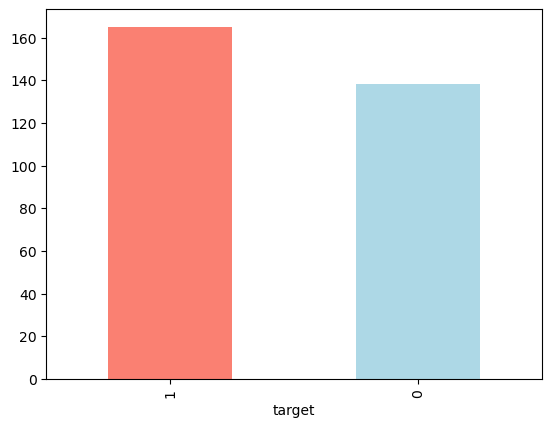

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4.1 Comparing one feature to another

If you want to compare two columns to each other, you can use the function [`pd.crosstab(index, columns)`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html). 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column. 

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. 

And for sex, 1 = male, 0 = female.

### 4.2 Making our comparison visual

I'm going to introduce you to a motto I remind myself of whenever I'm exploring data.

*Visualize, visualize, visualize!* - *The data explorer's motto*.

This is because it's very helpful whenever you're dealing with a new dataset to visualize as much as you can to build up an idea of the dataset in your head.

And one of the best ways to create visualizations is to make plots (graphical representations of our data).

We can plot our `pd.crosstab` comparison by calling the `plot()` method and passing it a few parameters:

* `kind`- The type of plot you want (e.g. `"bar"` for a bar plot).
* `figsize=(length, width)` - How big you want it to be.
* `color=[colour_1, colour_2]` - The different colours you'd like to use.

Different metrics are represented best with different kinds of plots. 

In our case, a bar graph is great. We'll see examples of more later. And with a bit of practice, you'll gain an intuition of which plot to use with different variables.

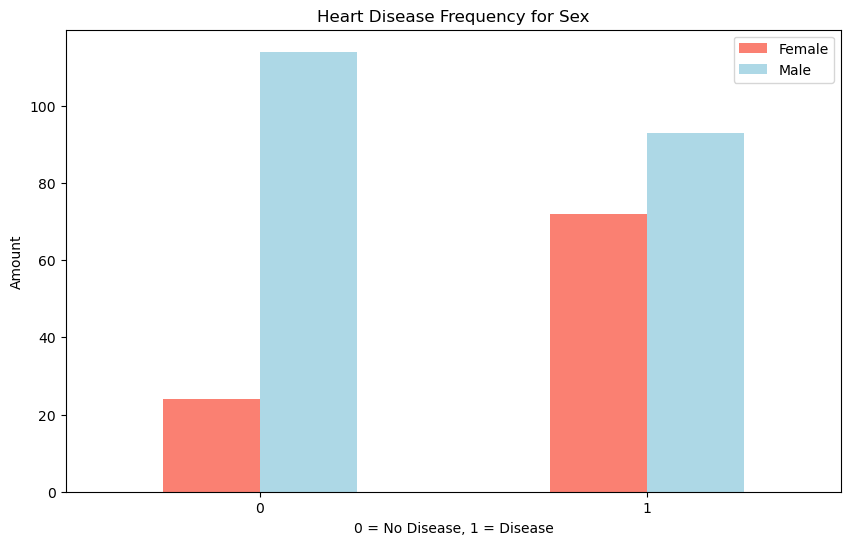

In [10]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

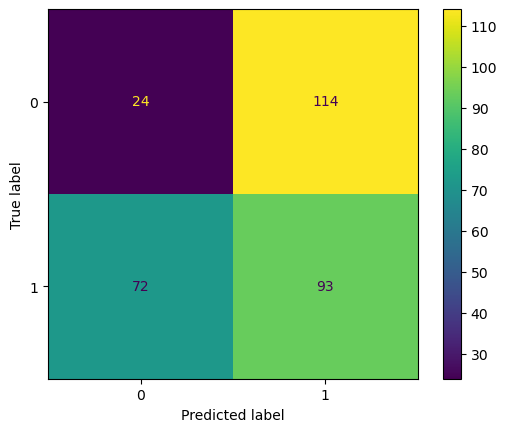

In [11]:
cm = confusion_matrix(df['target'], df['sex'])
ConfusionMatrixDisplay(cm).plot();

### 4.3 Comparing age and maximum heart rate

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

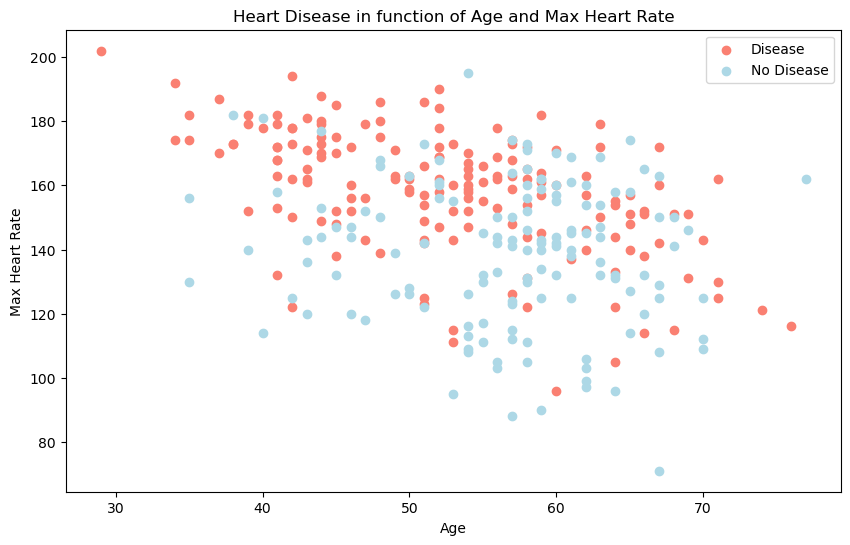

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

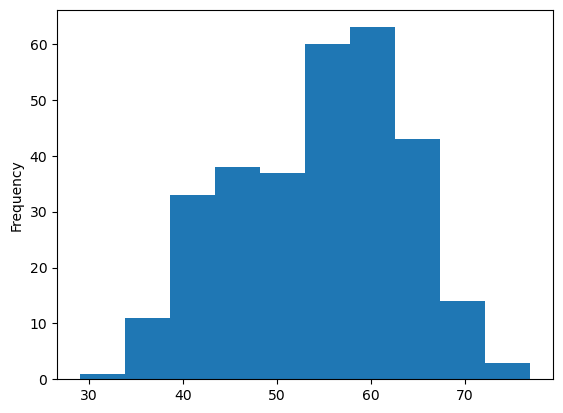

In [13]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

### 4.4 Comparing heart disease frequency and chest pain type

Let's try comparing another independent variable with our target variable. 

This time, we'll use `cp` (chest pain) as the independent variable.

We'll use the same process as we did before with `sex`.

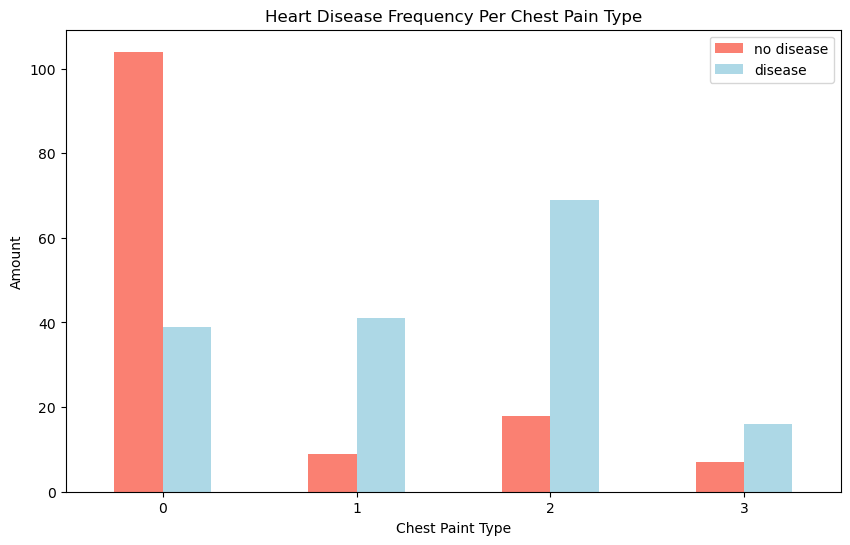

In [14]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Paint Type')
plt.ylabel('Amount')
plt.legend(['no disease', 'disease'])
plt.xticks(rotation=0);

### 4.5 Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using [`pd.DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) which will create a [**correlation matrix**](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices) for us, in other words, a big table of numbers telling us how related each variable is the other.

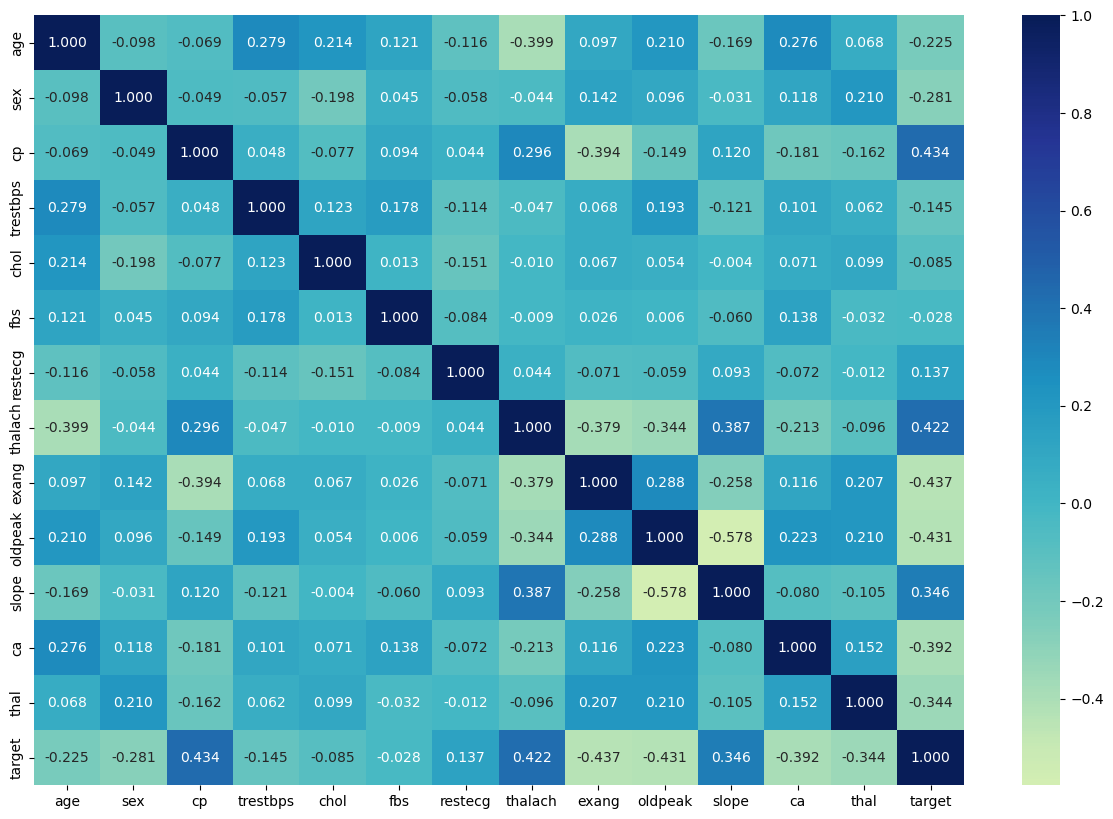

In [15]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlGnBu', center=0)
plt.show()

### 4.6 Enough EDA, let's model

Remember, we do exploratory data analysis (EDA) to start building an intuition of the dataset.

What have we learned so far? 

Aside from our baseline estimate using `sex`, the rest of the data seems to require a bit more exploration before we draw any conclusions.

So what we'll do next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.

A few extra things to remember:

* Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
* You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.
* Quite often, we'll want to find:
    * **Distributions** - What's the spread of the data? We can do this with [`pd.DataFrame.hist(column="target_column")`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).
    * **Missing values** - Is our data missing anything? Why might this be the case and will this affect us going forward? We can do this with [`pd.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) or [`pd.isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html).
    * **Outliers** - Are there any samples that lay quite far outside the rest of our data's distributions? How might these affect the data going forward?

With this being said, let's build some models!

## 5. Modeling

We've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5.1 Creating a training and test split

Now comes one of the most important concepts in machine learning, creating a **training/test split**.

This is where we'll split our data into a **training set** and a **test set**.

We'll use our training set to train our model and our test set to evaluate it.

All the samples in the training set must be separate from those in the test set (and vice versa).

In short:

* **Training set (often 70-80% of total data)** - Model learns patterns on this dataset to *hopefully* be able to predict on similar but unseen samples.
* **Testing set (often 20-30% of total data)** - Trained model gets evaluated on these unseen samples to see how the patterns learned from the training set may perform on future unseen samples (e.g. when used in an application or production setting). However, performance on the test set is not guaranteed in the real world.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients. 

How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. 

It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [17]:
x = df.drop('target', axis=1) # features
y = df['target'] # labels

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 5.2 Choosing a model

Now we've got our data prepared, we can start to fit models. 

In the modern world of machine learning, there are many potential models we can choose from.

Rather than trying every potential model, it's often good practice to try a handful and see how they go.

We'll start by trying the following models and comparing their results.

1. Logistic Regression - [`sklearn.linear_model.LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`sklearn.neighbors.KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Why these?

If we look at the [Scikit-Learn algorithm machine learning model map](https://scikit-learn.org/stable/machine_learning_map.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

| <img src="../ztm-ml/images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png" alt="an example classification path using the Scikit-Learn machine learning model map" width=500/> | 
|:--:| 
| An example path we can take using the Scikit-Learn Machine Learning Map |

> "Wait, I don't see Logistic Regression and why not use LinearSVC?"

Good questions. 

I was confused too when I didn't see Logistic Regression listed as well because when you read the Scikit-Learn documentation on it, you can see it's [a model for classification](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

And as for [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), let's pretend we've tried it (you can try it for yourself if you like), and it doesn't work, so we're following other options in the map.

For now, knowing each of these algorithms inside and out is not essential (however, this would be a fantastic extension to this project).

Machine learning and data science is an iterative practice. 

These algorithms are tools in your toolbox.

In the beginning, on your way to becoming a practitioner, it's more important to understand your problem (such as, classification versus regression) and what tools you can use to solve it.

Since our dataset is relatively small, we can run some quick experiments to see which algorithm performs best and iteratively try to improve it.

Many of the algorithms in the Scikit-Learn library have similar APIs (Application Programming Interfaces). 

For example, for training a model you can use [`model.fit(X_train, y_train)`](https://scikit-learn.org/stable/glossary.html#term-fit). 

And for scoring a model [`model.score(X_test, y_test)`](https://scikit-learn.org/stable/glossary.html#term-score) (scoring a model compares predictions to the ground truth labels). 

For classification models, calling `score()` usually defaults to returning the ratio (accuracy) of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1500),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [20]:
def fit_and_score(models, x_train, x_test, y_train, y_test, random_state=42):
    """
    Fits and evaluates given machine learning models.
    
    models: a dictionary of different Scikit-Learn machine learning models
    x_train: training features
    x_test: testing features
    y_train: training labels
    y_test: testing labels
    random_state: a random seed for reproducibility (default=42)
    
    Returns a dictionary of model names and their corresponding accuracy scores.
    """
    
    # Set random seed
    np.random.seed(random_state)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores

In [21]:
model_scores = fit_and_score(models=models, 
                            x_train=x_train, 
                            x_test=x_test, 
                            y_train=y_train, 
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### 5.3 Comparing the results of several models

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

In [22]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

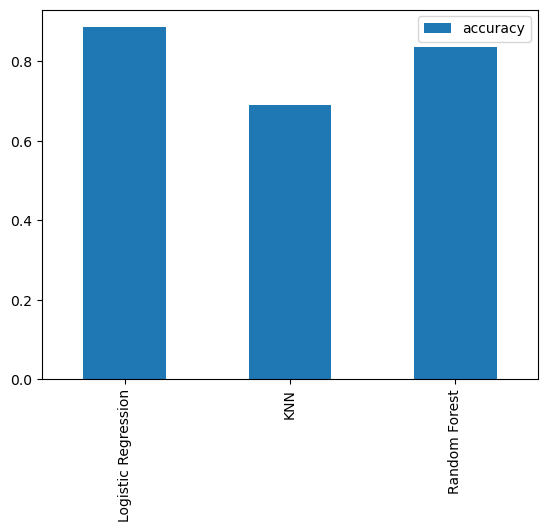

In [23]:
model_compare.T.plot.bar();

### 5.4 Taking our best model to the boss (and learning about a few new terms)

*A conversation with the boss/senior engineer begins...*

> **You:** I've found it!

> **Her:** Nice one! What did you find?
    
> **You:** The best algorithm for predicting heart disease is a Logistic Regression!

> **Her:** Excellent. I'm surprised the hyperparameter tuning is finished by now.

> **You:** *wonders what **hyperparameter tuning** is*
    
> **You:** Ummm yeah, me too, it went pretty quick.
    
> **Her:** I'm very proud, how about you put together a **classification report** to show the team, and be sure to include a **confusion matrix**, and the **cross-validated precision**, **recall** and **F1 scores**. I'd also be curious to see what **features are most important**. Oh and don't forget to include a **ROC curve**.
    
> **You:** *asks self, "what are those???"*
    
> **You:** Of course! I'll have to you by tomorrow.

Alright, there were a few words in there that could sound made up to someone who's not a budding data scientist like us. 

But being the budding data scientist we are, we also know data scientists make up words all the time.

Let's briefly go through each before we see them in action.

| **Term** | **Definition** |
| :----- | :----- |
| **Hyperparameter tuning** | Many machine learning models have a series of settings/dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance. The practice of figuring out the best settings for a model is called hyperparameter tuning. |
| **Feature importance** | If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age? |
| [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | 
| [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) | Splits your dataset into multiple versions of training and test sets and trains/evaluations your model on each different version. This ensures that your evaluation metrics are across several different splits of data rather than a single split (if it was only a single split, you might get lucky and get better than usual results, the same for the reverse, if you get a poor split, you might find your metrics lower than they should be). | 
| [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of samples. Higher precision leads to fewer false positives. |  
[**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) | A common classification evaluation metric. Measures the proportion of true positives over total number of true positives and false negatives. Higher recall leads to fewer false negatives. |
| [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) | Combines precision and recall into one metric. 1 is best, 0 is worst. |
| [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) | Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score. |
| [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) | [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate. A perfect curve will follow the left and top border of a plot. | 
| [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) | The area underneath the ROC curve. A perfect model achieves a score of 1.0. |

Woah!

There are a fair few things going on here but nothing we can't handle.

We'll explore each of these further throughout the rest of the notebook.

In the meantime, feel free to read more at the linked resources.

## 6. Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. 

But when your roommate cooks their favourite dish, they use 200 degrees and the fan-forced mode. 

Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. 

You change the settings and it works so well, it **overfits** (does too well) the data.

We're looking for the [Goldilocks model](https://en.wikipedia.org/wiki/Goldilocks_principle). 

One which does well on our training dataset but also on unseen examples like in the testing dataset/real world.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use [**cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html).

> **Note:** A validation set is a third player in the training/test split game. It's designed to be used in between a training and test set. You can think of it as the practice exam before the final exam. As in, the training set is the course material to learn on, the validation set is the practice exam to practice and tweak your skills on and the test set is the final exam to push your skills. In machine learning, the model learns patterns on the training set and then you can tweak hyperparameters to improve results on the validation set before finally testing your model on the testing set. All samples in the training, validation and test sets should be kept exclusive of each other.

The most common type of cross-validation is *k-fold*. 

It involves splitting your data into *k-fold's* or *k-different splits of the data* and then training and testing a model on each split.

For example, let's say we had 5 folds (k = 5). 

This is what it might look like.

| <img src="../ztm-ml/images/sklearn-cross-validation.png" width=500/> | 
|:--:| 
| Normal train and test split versus 5-fold cross-validation |

You have 5 different versions of train and test splits.

This means you'll be able to train and test 5 different versions of your model on different data splits and calculate the average performance.

Why do this?

This prevents us from focusing too much on the metrics from one data split (imagine the data split we do contains all the easy samples and the performance metrics we use say that the model performs better than it does).

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. 

We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

Here's the plan:

1. Tune model hyperparameters, and see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

In [24]:
np.random.seed(42)
train_scores = []
test_scores = []

neightbors = range(1, 21)
for k in neightbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=4)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [25]:
np.max(test_scores), np.argmax(test_scores)+1  # +1 because neightbors starts at 1

(np.float64(0.7540983606557377), np.int64(11))

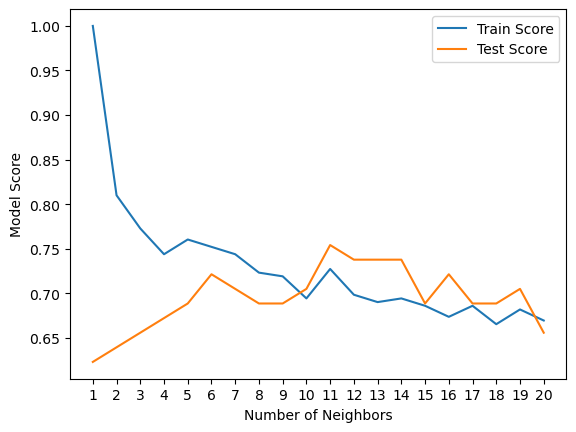

In [26]:
plt.plot(neightbors, train_scores, label='Train Score');
plt.plot(neightbors, test_scores, label='Test Score');
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.xticks(np.arange(1, 21, 1));

In [27]:
# Hyperparameter tuning with RandomizedSearchCV for Logistic Regression
lr_grid = {
    'C': np.logspace(-4,4, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [500,1500, 1500],
}

# Hyperparameter tuning with RandomizedSearchCV for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [28]:
np.random.seed(42)

# Randomized search CV for Logistic Regression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,#
                                n_jobs=4)

rs_lr.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [29]:
rs_lr.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'max_iter': 500,
 'C': np.float64(206.913808111479)}

In [30]:
rs_lr.score(x_test, y_test)

0.8524590163934426

In [31]:
# Randomized search CV for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True,
                            n_jobs=4)

rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
rs_rf.score(x_test, y_test)

0.8688524590163934

In [33]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(19),
 'max_depth': 10}

In [34]:
print(classification_report(y_test, rs_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [35]:
# Hyperparameters to test for Logistic Regression
lr_grid = {
    'C': np.logspace(-4,4, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [500,1500, 1500],
}

In [36]:
gs_lr = GridSearchCV(LogisticRegression(),
                        param_grid=lr_grid,
                        cv=5,
                        verbose=True,#
                        n_jobs=4)

gs_lr.fit(x_train, y_train);

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [37]:
gs_lr.best_params_

{'C': np.float64(0.23357214690901212),
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [38]:
gs_lr.score(x_test, y_test)

0.8852459016393442

In [39]:
# Hyperparameters to test for Random Forest Classifier
rf_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 21, 6),
    'min_samples_leaf': np.arange(2, 21, 6)
}

In [40]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                        param_grid=rf_grid,
                        cv=5,
                        verbose=True,#
                        n_jobs=4)

In [41]:
gs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [42]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': np.int64(14),
 'min_samples_split': np.int64(2),
 'n_estimators': 100}

In [43]:
gs_rf.score(x_test, y_test)

0.8688524590163934

## 7. Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

| Metric/Evaluation Technique | Scikit-Learn method/documentation |
| ----- | ----- |
| ROC curve and AUC score | [`sklearn.metrics.RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html), **Note:** This was previously `sklearn.metrics.plot_roc_curve()`, as of Scikit-Learn version 1.2+, it is `sklearn.metrics.RocCurveDisplay()`. |
| Confusion matrix | [`sklearn.metrics.confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) |
| Classification report | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |
| Precision | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) | 

Luckily, Scikit-Learn has these all built-in.

What many evaluation metrics have in common is that they compare model predictions to ground truth data.

So we'll need some model predictions!

To access them, we'll have to use our model to make predictions on the test set. 

We can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

> **Note:** When making predictions with a trained model, the data you're trying to predict on must be in the same format your model was trained on. For example, if a model was trained with data formatted in a certain way, it's important to make future predictions on data formatted in that same way. 

### 7.1 ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `RocCurveDisplay` (previously called `plot_roc_curve` in Scikit-Learn versions < 1.2) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) function we can see it has a class method called [`from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) as inputs. 

Where `estimator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

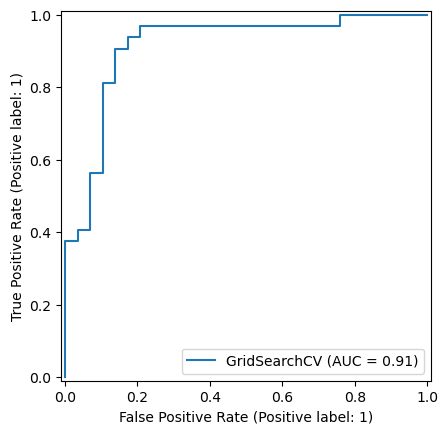

In [44]:
RocCurveDisplay.from_estimator(gs_rf, x_test, y_test);

Text(0, 0.5, 'Predicted label')

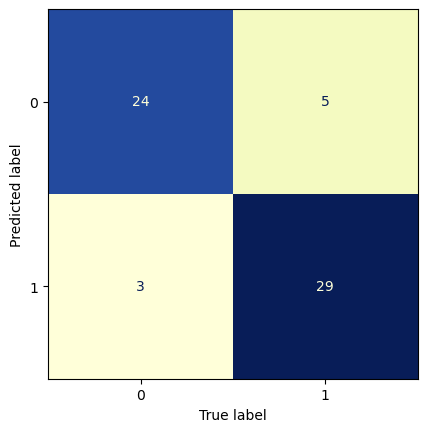

In [45]:
cm = confusion_matrix(y_test, gs_rf.predict(x_test))
ConfusionMatrixDisplay(cm).plot(colorbar=False, cmap='YlGnBu')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [46]:
print(classification_report(y_test, gs_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [47]:
gs_lr.best_params_

{'C': np.float64(0.23357214690901212),
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'liblinear'}

What's going on here?

Let's refresh ourselves on of the above metrics.

| **Metric/metadata** | **Explanation** | 
| ----- | ----- | 
| **Precision** | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall** | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score** | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support** | The number of samples each metric was calculated on. |
| **Accuracy** | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |
| **Macro avg** | Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric. |
| **Weighted avg** | Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples). |

Ok, now we've got a few deeper insights on our model. 

But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. 

It then evaluates the machine learning model on the data and labels using cross-validation across `cv=5` (the default number of splits) splits and a defined `scoring` parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [48]:
clf = LogisticRegression(C=0.23357214690901212, max_iter=500, penalty='l2', solver='liblinear')

In [49]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

# Cross-validated Precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring='precision')

# Cross-validated Recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')

# Cross-validated F1-score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')

In [50]:
cv_acc.mean(), cv_precision.mean(), cv_recall.mean(), cv_f1.mean()

(np.float64(0.8479781420765027),
 np.float64(0.8215873015873015),
 np.float64(0.9272727272727274),
 np.float64(0.8705403543192143))

In [51]:
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1-score': cv_f1
})

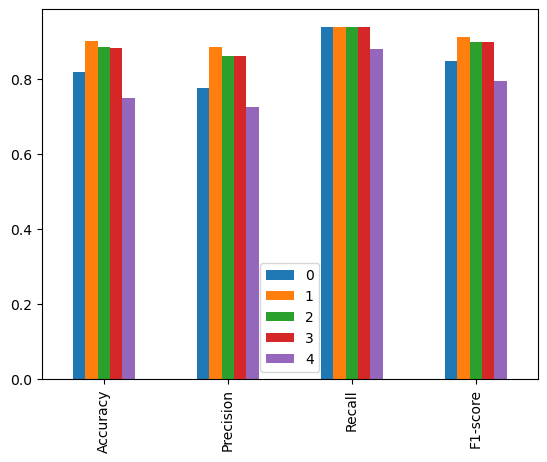

In [52]:
cv_metrics.T.plot.bar();

## 8. Feature importance

Feature importance is another way of asking, "Which features contribute most to the outcomes of the model?"

For our problem, trying to predict heart disease using a patient's medical characteristics, getting the feature importance is like asking "Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

Because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. 

This means for each model, there's a slightly different way of finding which features were most important and in turn, the feature importance of one model won't necessarily reflect the feature importance of another.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "MODEL TYPE feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

In [53]:
clf = LogisticRegression(C=0.23357214690901212, max_iter=500, penalty='l2', solver='liblinear')
clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.23357214690901212
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [54]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [55]:
features_dict = dict(zip(x.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.003699220776580221),
 'sex': np.float64(-0.9042409028785717),
 'cp': np.float64(0.6747282587404362),
 'trestbps': np.float64(-0.011613401339975146),
 'chol': np.float64(-0.0017036439067759743),
 'fbs': np.float64(0.047876881148997324),
 'restecg': np.float64(0.3349019815885189),
 'thalach': np.float64(0.02472938284108309),
 'exang': np.float64(-0.6312040612837573),
 'oldpeak': np.float64(-0.5759095045469952),
 'slope': np.float64(0.4709514073081419),
 'ca': np.float64(-0.6516534770577476),
 'thal': np.float64(-0.6998420764664995)}

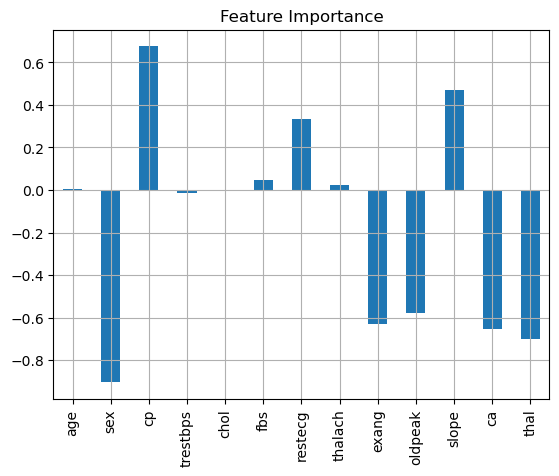

In [56]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);
plt.grid();

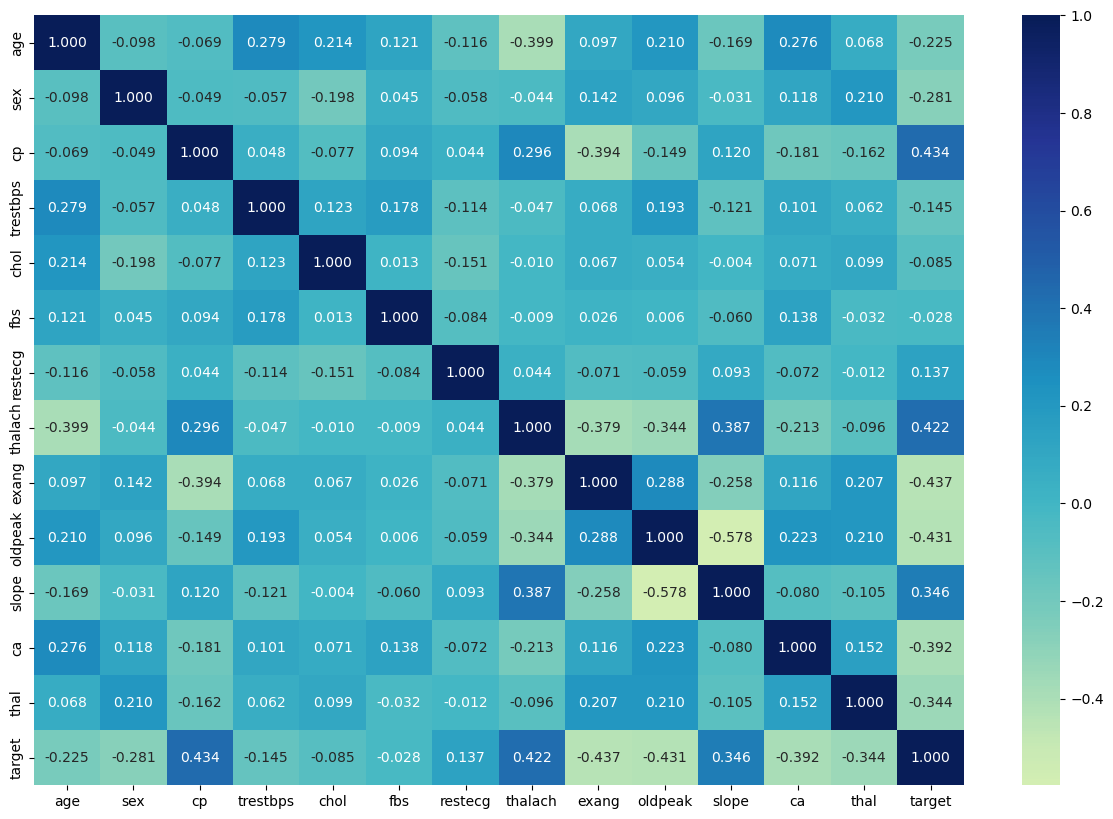

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlGnBu', center=0)
plt.show()

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values. 

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

We can see this by comparing the `sex` column to the `target` column.

In [58]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [59]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see `slope` is the "slope of the peak exercise ST segment" where:
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
    
According to the model, there's a positive correlation of 0.470, not as strong as `sex` and `target` but still more than 0.

This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

Is this true?

When you look at the contrast (`pd.crosstab(df["slope"], df["target"]`) it is. As `slope` goes up, so does `target`. 

What can you do with this information?

This is something you might want to talk to a subject matter expert about. 

They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation). 

Doing this has a few benefits:
1. **Finding out more** - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. **Redirecting efforts** - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
3. **Less but better** - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

In [60]:
# clf = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_split=2, min_samples_leaf=8)
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
clf.score(x_test, y_test)

0.8688524590163934

In [62]:
clf.feature_importances_, clf.feature_names_in_

(array([0.09205036, 0.03803318, 0.11013373, 0.0732677 , 0.0782906 ,
        0.01036332, 0.01902561, 0.10947866, 0.07047452, 0.12598891,
        0.04838502, 0.12830861, 0.09619978]),
 array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object))

In [63]:
features_rf_df = pd.DataFrame({'feature': clf.feature_names_in_,
                                 'importance': clf.feature_importances_})

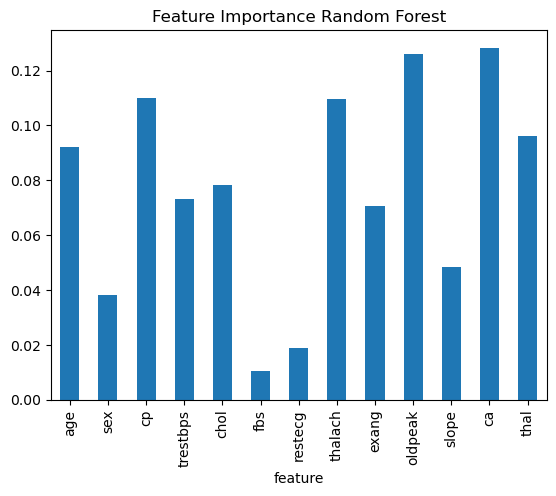

In [64]:
features_rf_df.plot.bar(x='feature', y='importance', title='Feature Importance Random Forest', legend=False);

In [67]:
features_rf_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,ca,0.128309
1,oldpeak,0.125989
2,cp,0.110134
3,thalach,0.109479
4,thal,0.096200
5,age,0.092050
6,chol,0.078291
7,trestbps,0.073268
8,exang,0.070475
9,slope,0.048385
